# Assignment 1
### Hui Lyu
## Downloading Gaia data
This notebook is a simple example of downloading Gaia data, loading it in, and doing simple plots of it.

In [1]:
!curl -OJ https://girder.hub.yt/api/v1/file/57fcf27bb8805f000164ab40/download
# Windows 10

curl: Saved to filename 'gaia_validp.h5'


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  2 93.8M    2 1968k    0     0  2569k      0  0:00:37 --:--:--  0:00:37 2569k
  5 93.8M    5 5260k    0     0  2978k      0  0:00:32  0:00:01  0:00:31 2978k
  8 93.8M    8 8472k    0     0  3062k      0  0:00:31  0:00:02  0:00:29 3062k
 12 93.8M   12 11.4M    0     0  3115k      0  0:00:30  0:00:03  0:00:27 3115k
 15 93.8M   15 14.6M    0     0  3144k      0  0:00:30  0:00:04  0:00:26 3144k
 18 93.8M   18 17.6M    0     0  3138k      0  0:00:30  0:00:05  0:00:25 3225k
 21 93.8M   21 20.6M    0     0  3122k      0  0:00:30  0:00:06  0:00:24 3172k
 24 93.8M   24 23.3M    0     0  3080k      0  0:00:31  0:00:07  0:00:24 3090k
 27 93.8M   27 25.9M    0     0  3031k      0  0:00:31  0:00:08  0:00:23 2968k
 29 93.8M   29 28.0M    0     0  2942k      0  0:00

In [2]:
%matplotlib inline

In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = {}
with h5py.File("gaia_validp.h5") as f:
    for k in f:
        data[k] = f[k][:]

In [5]:
print(data.keys())

dict_keys(['pmra', 'dec', 'ra', 'phot_g_mean_mag', 'pmdec', 'parallax'])


In [6]:
type(data)

dict

In [7]:
data

{'dec': array([ 0.23539165,  0.20006769,  0.24882544, ..., -0.34317732,
        -0.2281136 , -0.22130082]),
 'parallax': array([ 6.35295075,  3.90032894,  3.15531322, ...,  6.03693811,
         1.48414231,  2.68011134]),
 'phot_g_mean_mag': array([  7.99137783,  10.58095872,  10.74310238, ...,   9.23885216,
          9.01706935,   9.73257118]),
 'pmdec': array([ -7.64198999, -55.10917286,  -1.6028671 , ..., -27.85234475,
          1.84710791,   3.15173424]),
 'pmra': array([ 43.75231342,  10.036263  ,   2.93228368, ...,  15.71355591,
         11.35288892,   2.89787878]),
 'ra': array([  45.03433035,   45.16500677,   45.08615484, ...,  315.28287959,
         314.74064816,  314.9607306 ])}

## GAIA Data Documentation
https://gaia.esac.esa.int/documentation/GDR1/datamodel/Ch1/gaia_source.html
* dec : Declination (double, Angle[deg])

Barycentric declination δ of the source in ICRS at the reference epoch ref_epoch

* parallax : Parallax (double, Angle[mas] )

Absolute barycentric stellar parallax ϖ of the soure at the reference epoch ref_epoc

* phot_g_mean_mag : G-band mean magnitude (double, Magnitude[mag])

Mean magnitude in the G band. This is computed from the G-band mean flux applying the magnitude zero-point in the Vega scale. 

* pmdec : Proper motion in declination direction (double, Angular Velocity[mas/year] )

Proper motion in declination μδ of the source at the reference epoch ref_epoch. This is the projection of the proper motion vector in the direction of increasing declination. 

* pmra : Proper motion in right ascension direction (double, Angular Velocity[mas/year] )

Proper motion in right ascension μα⁣* of the source in ICRS at the reference epoch ref_epoch. This is the projection of the proper motion vector in the direction of increasing right ascension. 

* ra : Right ascension (double, Angle[deg])

Barycentric right ascension α of the source in ICRS at the reference epoch ref_epoch

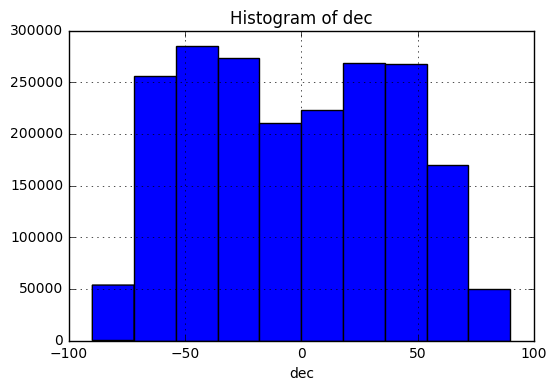

In [8]:
# Plot a histogram of dec to show its distribution.
# This could give a general understanding of the dec data 
# based on the amount of data in different intervals.
plt.hist(data['dec'])
plt.title('Histogram of dec')
plt.xlabel('dec')
plt.grid(True)
plt.show()
# It can be found that most values are between -75 and 75 approximately. 
# Among them, basically (-75,-18) and (18,55) intervlas have the most values.

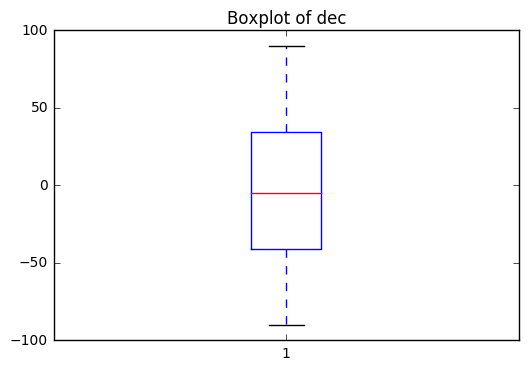

In [9]:
# Based on the nearly centralized distribution of dec, a boxplot can also be intuitionistic.
# It has meaningful quantiles. There is no outlier.
plt.boxplot(data['dec'])
plt.title('Boxplot of dec')
plt.show()

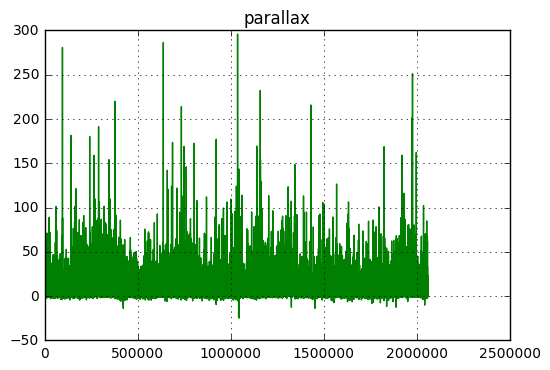

In [10]:
# Plot of parallax
# Direct plot of parallax data can demonstrate each value. There is no approximation.
# In this way, the representation of detailed values may imply some patterns such as a cycle.
plt.plot(data['parallax'],"g")
plt.title('parallax')
plt.grid(True)
plt.show()
# It seems there is a rough cycle period of the values.
# Further observation of the top values can help understand the phenomenon better.

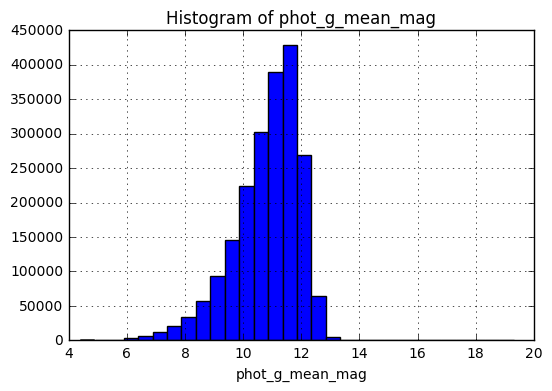

In [11]:
# Plot a histogram of phot_g_mean_mag to show its distribution.
# It could be an overview of the data.
# I do not want to see each value at this time.
plt.hist(data['phot_g_mean_mag'], 30)
plt.title('Histogram of phot_g_mean_mag')
plt.xlabel('phot_g_mean_mag')
plt.grid(True)
plt.show()
# Most values are between 8 and 13 in general.
# A left skewed distribution can also be found based on the graph.

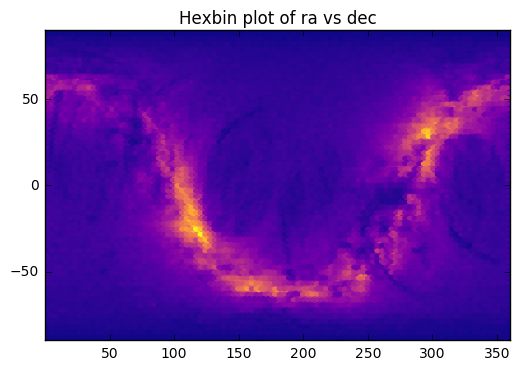

In [12]:
# Hexbin plot of dec vs ra
# I just want to test the use of hexbin plot.
# I tried several parameters in the given data, 
# and found that dec and ra data could generate a seemingly beautiful graph.
# More background knowledge is needed for me to make an analysis of the graph.
plt.hexbin(data['ra'],data['dec'],cmap='plasma')
plt.title("Hexbin plot of ra vs dec")
plt.show()

In [13]:
data['pmra'].size

2057050

In [14]:
data['ra'].size

2057050

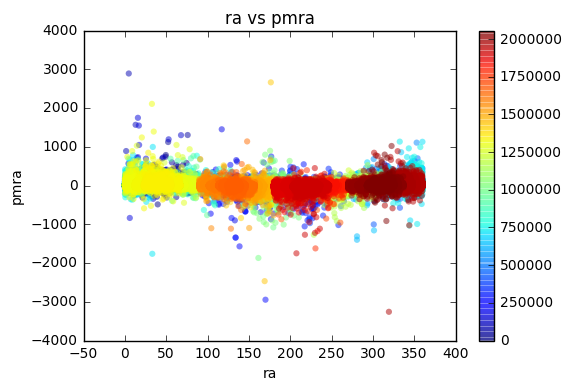

In [15]:
# Plot a scatter plot of ra and pmra to show their relationship
# I would like to know how proper motion affects the values.
plt.scatter(data['ra'],data['pmra'],alpha=0.5,c=np.arange(data['ra'].size),edgecolors='none')
# The color bar is generated according to the index of data.
# I suppose the index has its special meaning but it may not be true.
# Set the edgecolors to be none can clearly help to see most values.
plt.colorbar()
plt.xlabel('ra')
plt.ylabel('pmra')
plt.title('ra vs pmra')
plt.show()